# Parks in the City of Los Angeles 

I decided to redo my mapping of the parks in Southern California to have a base map. I wanted to do an isochrone with the parks but it didn't work out so I just focused on East Compton. 

In [2]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


I'm importing the So Cal Parks file so that I can use what we learned from last weeks lap on the park data. I also have the park data as a shapefile but found a code to convert it into  GeoJSON file. 

In [3]:

parks = gpd.read_file('SoCalParks.zip')
parks.to_file('SoCalParks.geojson', driver='GeoJSON')

<AxesSubplot:>

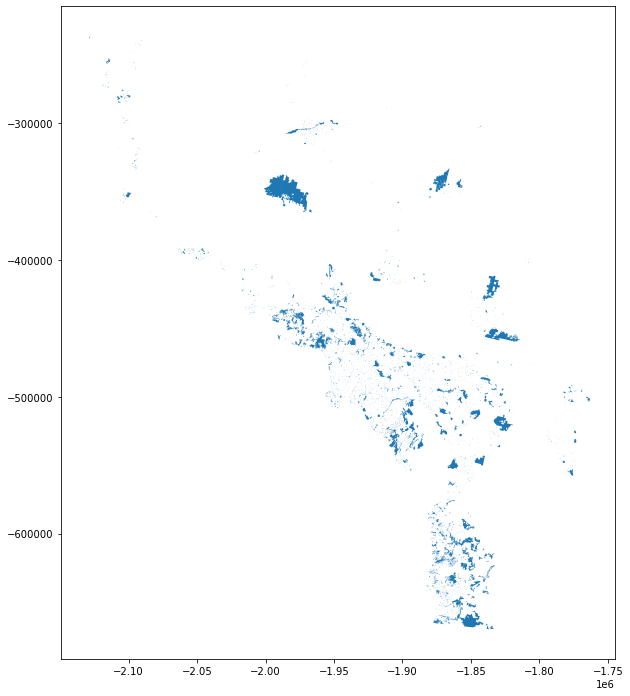

In [4]:
parks.plot(figsize=(12,12))

In [9]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6412 entries, 0 to 6411
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6412 non-null   int64   
 1   ParkID      6412 non-null   object  
 2   GISTrkrID   6412 non-null   int64   
 3   SourceID    6412 non-null   int64   
 4   Park_Name   6407 non-null   object  
 5   Park_Desig  6412 non-null   object  
 6   Park_Owner  6411 non-null   object  
 7   Park_Local  6411 non-null   object  
 8   Park_Manag  6411 non-null   object  
 9   Park_Loc_1  6409 non-null   object  
 10  Park_Acces  6412 non-null   int64   
 11  Park_Statu  6412 non-null   object  
 12  Park_Land_  6412 non-null   int64   
 13  Park_Est_D  142 non-null    object  
 14  Park_Size_  6412 non-null   float64 
 15  Park_Size1  6412 non-null   float64 
 16  Park_Siz_1  6412 non-null   float64 
 17  Park_Addre  2621 non-null   object  
 18  Park_State  6406 non-null   object  
 19

In [7]:
parks.head()


OBJECTID        ParkID  GISTrkrID  SourceID  \
0     21881  0622678-0033       3941        33   
1     21882  0622678-0072       3941        72   
2     21883  0613392-0029        207        29   
3     21884  0666000-0006        117         6   
4     21885  0601192-0002       3941         2   

                            Park_Name Park_Desig Park_Owner  \
0  Encinitas Ranch Community Use Site        HCA       CITY   
1                          Open Space        LCA       CITY   
2                       Sunridge Park         LP       CITY   
3                   Carmel Mtn Rch Cp         LP       CITY   
4                      Wright'S Field         LP        NGO   

                Park_Local Park_Manag               Park_Loc_1  ...  \
0       Encinitas, City of       CITY       Encinitas, City of  ...   
1       Encinitas, City of       CITY       Encinitas, City of  ...   
2      CITY OF CHULA VISTA       CITY      CITY OF CHULA VISTA  ...   
3        City of San Diego       CITY        City of San Diego  ...   
4  Back Country Land Trust        NGO  Back Country Land Trust  ...   

   SUM_AMERIN SUM_ASIAN_  SUM_PACIFI SUM_OTHRAC  SUM_RACE2U  SUM_HISP_S  \
0         2.0      154.0         1.0        2.0        43.0       309.0   
1         0.0        0.0         0.0        0.0         0.0         0.0   
2         6.0      376.0         7.0        2.0        70.0      1065.0   
3         2.0      421.0         6.0        2.0        93.0       183.0   
4         7.0       20.0         2.0        0.0        21.0       147.0   

       PLACEKEY   Shape_Leng     Shape_Area  \
0  @5z5-pz2-t35  1238.601898   38389.000929   
1  @5z5-t73-q75  1726.331411   41269.897685   
2  @5z5-wmz-m8v   786.235007   26643.407510   
3  @5z5-pvj-pjv  1124.611677   74660.211205   
4  @5z5-s32-5pv  7386.371789  935065.191971   

                                            geometry  
0  MULTIPOLYGON (((-1877375.852 -602857.505, -187...  
1  POLYGON ((-1875761.267 -602210.384, -1875757.6...  
2  POLYGON ((-1865972.612 -656289.452, -1865971.2...  
3  POLYGON ((-1863379.242 -616533.243, -1863340.8...  
4  MULTIPOLYGON (((-1838769.583 -638590.002, -183...  

[5 rows x 52 columns]

In [6]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6412 entries, 0 to 6411
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6412 non-null   int64   
 1   ParkID      6412 non-null   object  
 2   GISTrkrID   6412 non-null   int64   
 3   SourceID    6412 non-null   int64   
 4   Park_Name   6407 non-null   object  
 5   Park_Desig  6412 non-null   object  
 6   Park_Owner  6411 non-null   object  
 7   Park_Local  6411 non-null   object  
 8   Park_Manag  6411 non-null   object  
 9   Park_Loc_1  6409 non-null   object  
 10  Park_Acces  6412 non-null   int64   
 11  Park_Statu  6412 non-null   object  
 12  Park_Land_  6412 non-null   int64   
 13  Park_Est_D  142 non-null    object  
 14  Park_Size_  6412 non-null   float64 
 15  Park_Size1  6412 non-null   float64 
 16  Park_Siz_1  6412 non-null   float64 
 17  Park_Addre  2621 non-null   object  
 18  Park_State  6406 non-null   object  
 19

In [7]:
type(parks.Park_Urban)

pandas.core.series.Series

IndexError: boolean index did not match indexed array along dimension 0; dimension is 6407 but corresponding boolean dimension is 6412

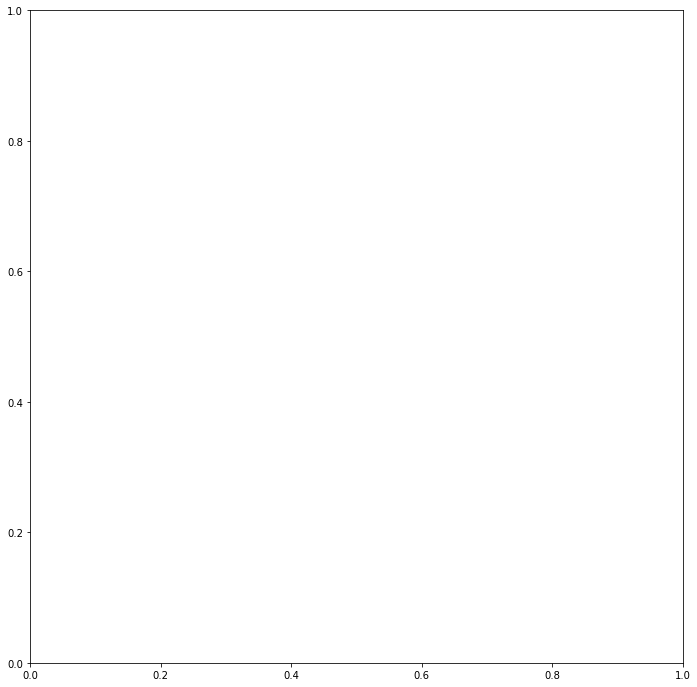

In [10]:
parks.plot(figsize=(12,12),
                 column='Park_Urban',
                 legend=True, 
                 scheme='NaturalBreaks')

I get this error for when I try to map the "Parks_Urban variable" which will tell me the location of urban parks. I only want to look at parks in Los Angeles, so I really need to map this variable. I saw that the variable is an "object" and read that that is the issue I'm running into. Therefore, I have to find a code which will change it from object to something that will work. I need to change it to a string variable because that seems like the only other basic type it would fall into.

In [11]:
parks['Park_Urban'] = parks ['Park_Urban'].astype(str)

It seems like it worked so let's try to plot it. 

<AxesSubplot:>

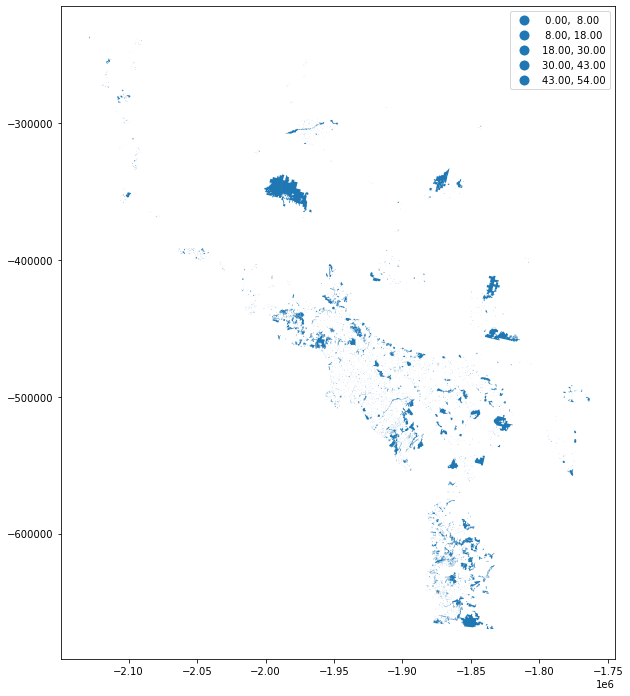

In [12]:
parks.plot(figsize=(12,12),
                 column='Park_Urban',
                 legend=True, 
                 scheme='NaturalBreaks')

Success! However, I should probably change all the variables that are objects into strings :( 

In [13]:
parks['Park_Name'] = parks ['Park_Name'].astype(str)
parks['Park_Desig'] = parks ['Park_Desig'].astype(str)
parks['Park_Owner'] = parks ['Park_Owner'].astype(str)
parks['Park_Local'] = parks ['Park_Local'].astype(str)
parks['Park_Manag'] = parks ['Park_Manag'].astype(str)
parks['Park_Loc_1'] = parks ['Park_Loc_1'].astype(str)
parks['Park_Statu'] = parks ['Park_Statu'].astype(str)
parks['Park_Est_D'] = parks ['Park_Est_D'].astype(str)
parks['Park_Addre'] = parks ['Park_Addre'].astype(str)
parks['Park_State'] = parks ['Park_State'].astype(str)
parks['Park_Sta_1'] = parks ['Park_Sta_1'].astype(str)
parks['Park_Count'] = parks ['Park_Count'].astype(str)   
parks['Park_Cou_1'] = parks ['Park_Cou_1'].astype(str)     
parks['Park_Place'] = parks ['Park_Place'].astype(str)
parks['Park_Pla_1'] = parks ['Park_Pla_1'].astype(str)   
parks['Park_Urb_1'] = parks ['Park_Urb_1'].astype(str)     
parks['Park_Zip'] = parks ['Park_Zip'].astype(str)
parks['Park_Bound'] = parks ['Park_Bound'].astype(str)   
parks['Park_Sourc'] = parks ['Park_Sourc'].astype(str)     
parks['Park_Feedb'] = parks ['Park_Feedb'].astype(str)
parks['Park_DateA'] = parks ['Park_DateA'].astype(str) 
parks['DataShare_'] = parks ['DataShare_'].astype(str)


I don't know if I needed to convert all those variables but I hated that process and wanted to get it over with in case I ended up using a variable I hadn't thought of. 

<AxesSubplot:>

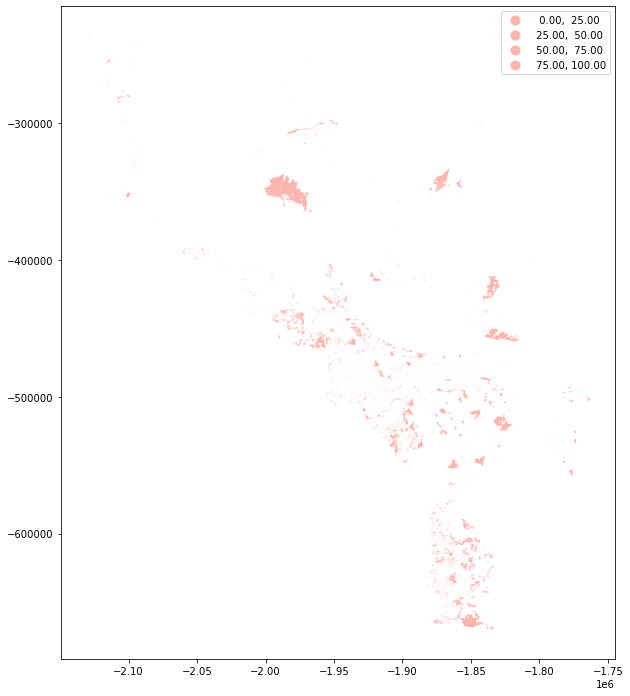

In [14]:
parks.plot(figsize=(12,12),
            column='Park_Urban', 
            cmap='Pastel1', 
            scheme='user_defined',
            classification_kwds={'bins':[25, 50, 75, 100]},
            edgecolor='white', 
            linewidth=0.1, 
            legend=True
           )

This is the color I used before, but it is hideous in this format. 

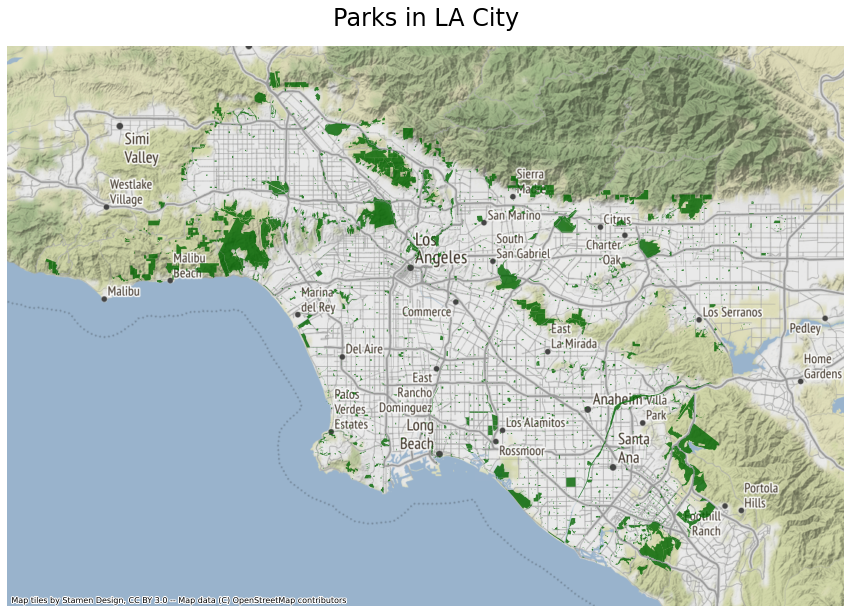

In [16]:
parks_web_mercator = parks.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 
parks_web_mercator[parks_web_mercator['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA'].plot(                                      
                                                               ax=ax,
                                                               color="darkgreen",
                                                               alpha=0.8
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Parks in LA City',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax)

I forgot that the Park Urban area is the metropolitan area and includes more than just parks in the City but the entire urban area. However, this is still a pretty cool map. 

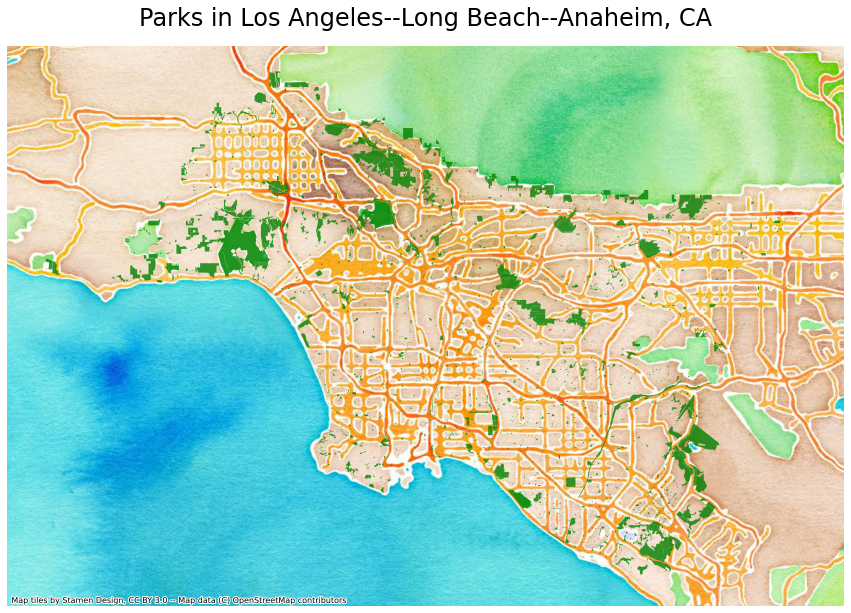

In [17]:
parks_web_mercator = parks.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 
parks_web_mercator[parks_web_mercator['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA'].plot(                                      
                                                               ax=ax,
                                                               color="green",
                                                               alpha=0.8
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Parks in Los Angeles--Long Beach--Anaheim, CA',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.Watercolor)

Love the watercolor but not great for this research project. I chose green because parks (duh) but it has a terrible contrast. 

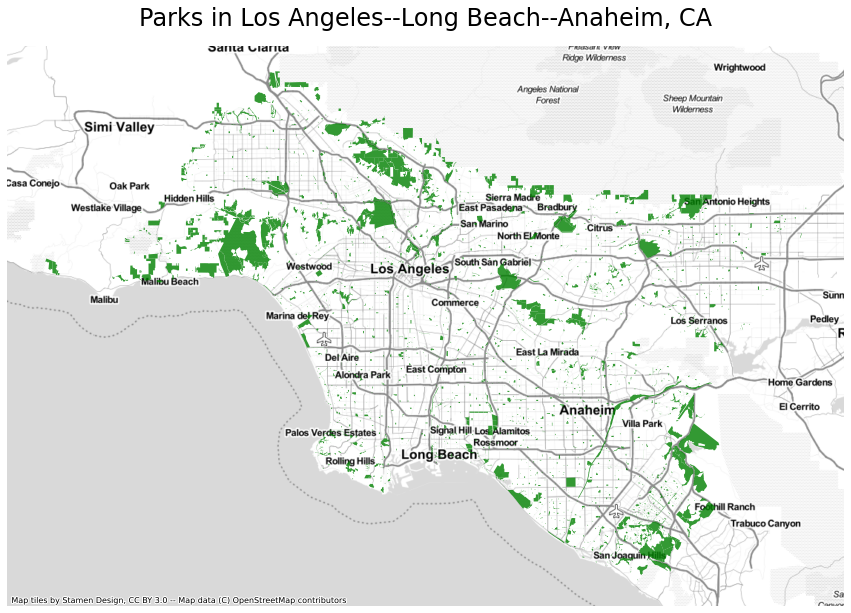

In [18]:
parks_web_mercator = parks.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 
parks_web_mercator[parks_web_mercator['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA'].plot(                                      
                                                               ax=ax,
                                                               color="green",
                                                               alpha=0.8
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Parks in Los Angeles--Long Beach--Anaheim, CA',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

This map is much nicer!!!! The contrast is better than the other two maps. The next step is figuring out how to only include informtion for LA City. If all else fails I could just use the clip tool on ArcGIS with the boundaries for LA City. Now lets try to make an isochrone map. I'm hoping I can create a map of potentially East comptom because we can see in this map there hardly any green space from the TPL park map. 

In [20]:
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

In [21]:
address = 'East Compton, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 #

I'm hoping we can find walking distance to a park. However, I'm not sure how to do this because we looked at walking distance from a central loction but I'm hopeful. 

In [22]:
EC = ox.graph_from_address(address, network_type=network_type, dist = 2000)

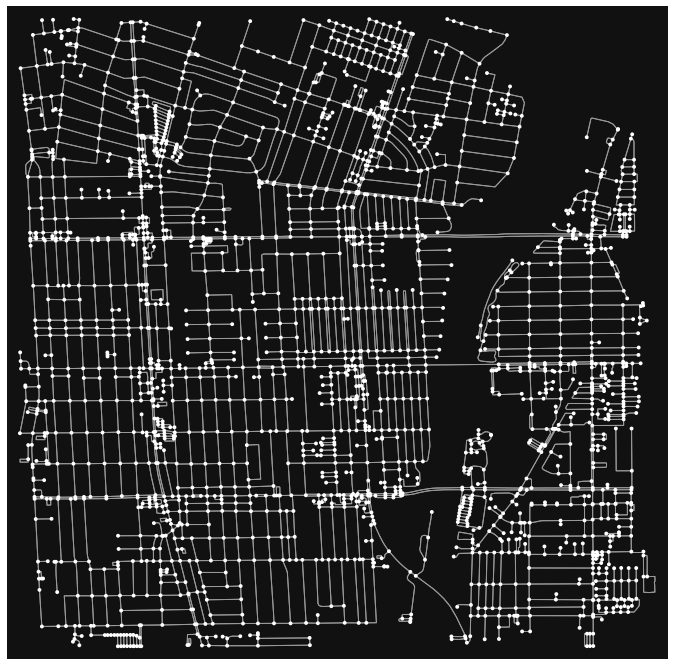

In [23]:
fig, ax = ox.plot_graph(EC,figsize=(12,12))

Slowly, realizing that I don't know how to combine these maps lol. I am less hopeful. 

In [24]:
gdf_ECnodes, gdf_ECedges = ox.graph_to_gdfs(EC)

In [25]:
gdf_ECnodes.sample(10)

y           x          highway  street_count  \
osmid                                                              
7823055245  33.881391 -118.182632              NaN             1   
123106277   33.890568 -118.202258              NaN             4   
122555349   33.904578 -118.215462              NaN             3   
122821277   33.901909 -118.193784              NaN             4   
122577988   33.898329 -118.208068  traffic_signals             4   
3536180579  33.893985 -118.176402              NaN             1   
7631873859  33.881617 -118.176828              NaN             1   
122555381   33.895321 -118.207119              NaN             1   
5563904943  33.909829 -118.206905              NaN             3   
6812355558  33.904378 -118.204345              NaN             3   

                               geometry  
osmid                                    
7823055245  POINT (-118.18263 33.88139)  
123106277   POINT (-118.20226 33.89057)  
122555349   POINT (-118.21546 33.90458)  
122821277   POINT (-118.19378 33.90191)  
122577988   POINT (-118.20807 33.89833)  
3536180579  POINT (-118.17640 33.89399)  
7631873859  POINT (-118.17683 33.88162)  
122555381   POINT (-118.20712 33.89532)  
5563904943  POINT (-118.20691 33.90983)  
6812355558  POINT (-118.20434 33.90438)

<AxesSubplot:>

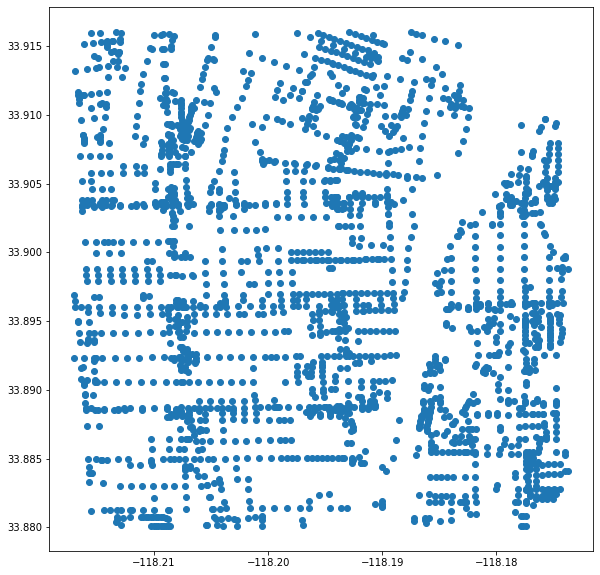

In [26]:
gdf_ECnodes.plot(figsize=(10,10))

<AxesSubplot:>

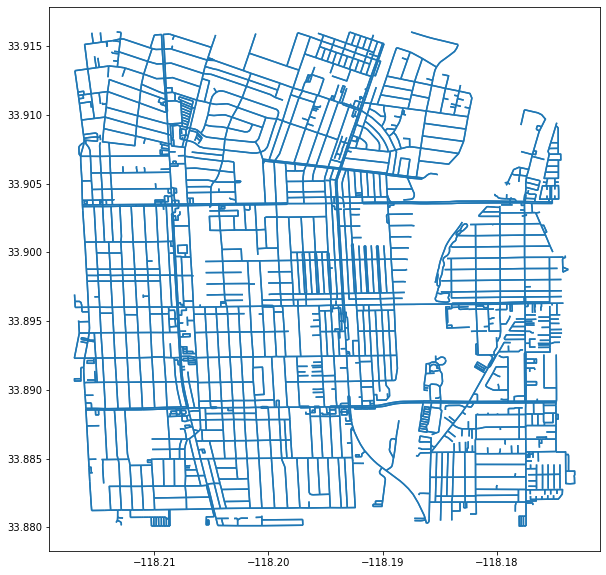

In [27]:
gdf_ECedges.plot(figsize=(10,10))

<AxesSubplot:>

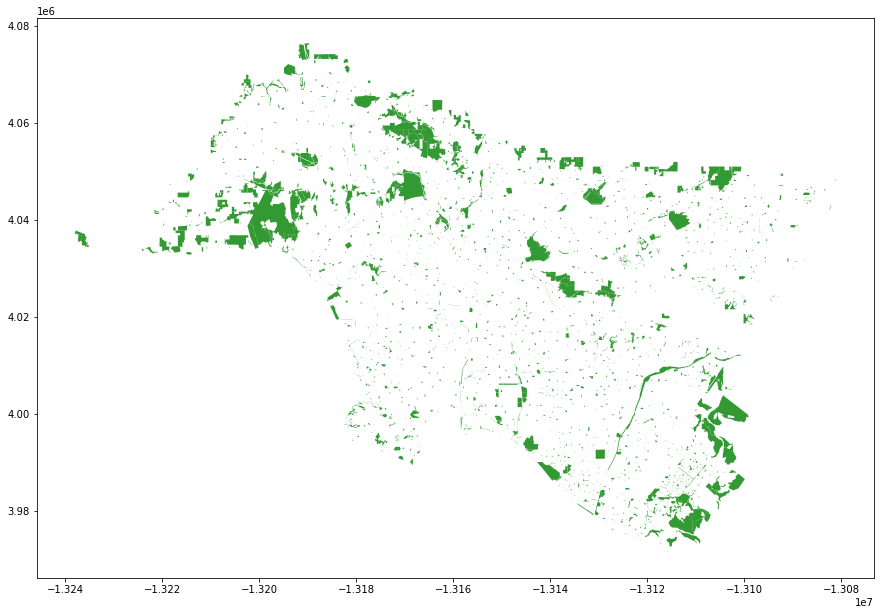

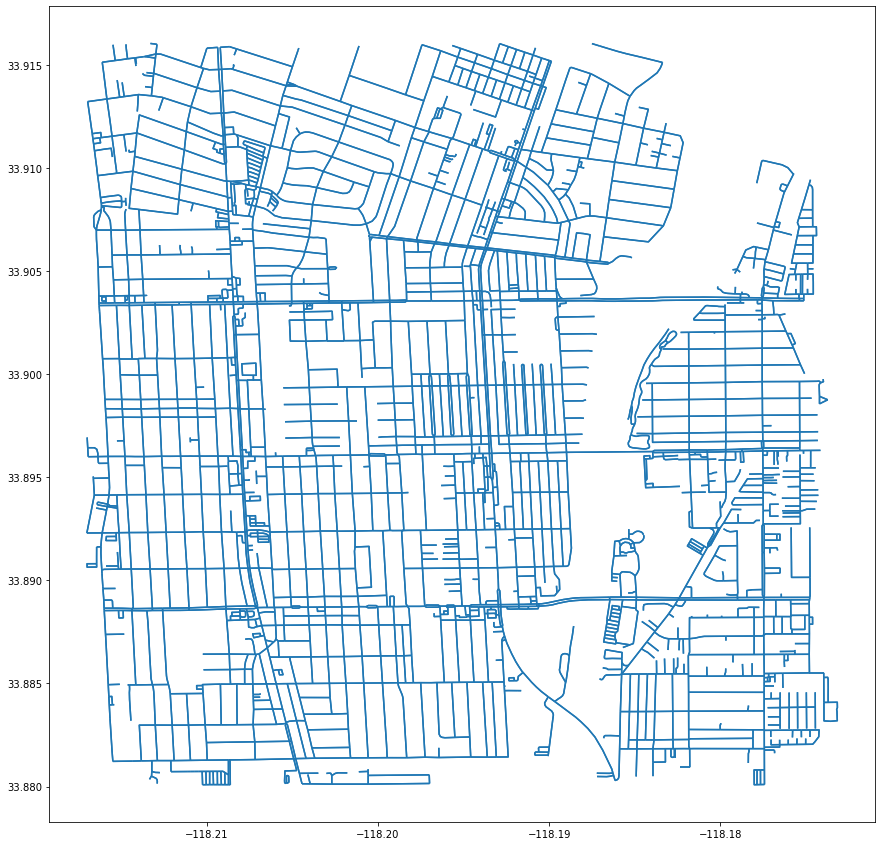

In [28]:
parparks_web_mercator = parks.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 
parks_web_mercator[parks_web_mercator['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA'].plot(                                      
                                                               ax=ax,
                                                               color="green",
                                                               alpha=0.8
)
gdf_ECedges.plot(figsize=(15, 15))

I got two separate plots. I'll try something else. 

AttributeError: 'LineCollection' object has no property 'zoom'

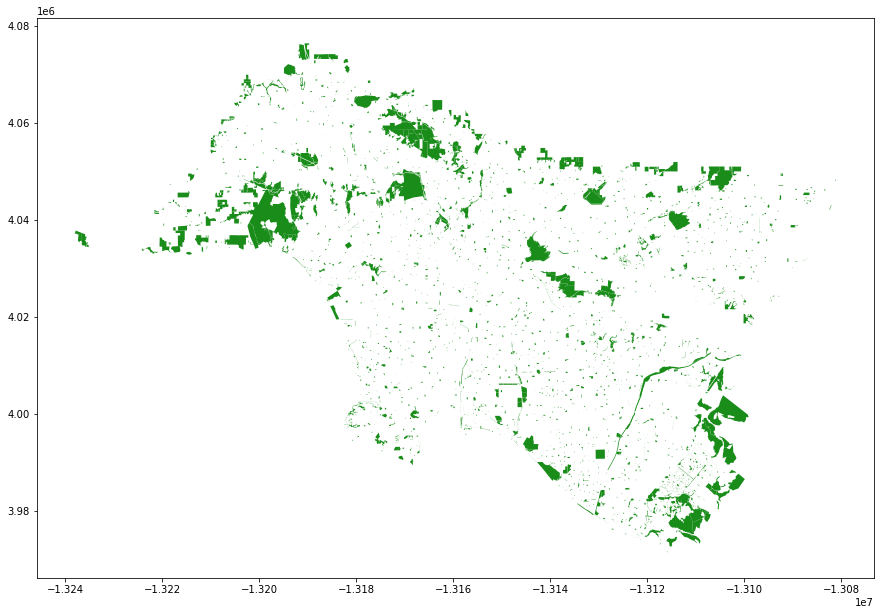

In [86]:
parks_web_mercator = parks.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 
parks_web_mercator[parks_web_mercator['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA'].plot(                                      
                                                               ax=ax,
                                                               color="green",
                                                               alpha=0.9
)

gdf_ECedges_web_mercator = gdf_ECedges.to_crs(epsg = 3857)

gdf_ECedges_web_mercator.plot( 
                        ax=ax,
                        zoom = 10
)

Okay, I did it. But the zoom is all wrong

<AxesSubplot:>

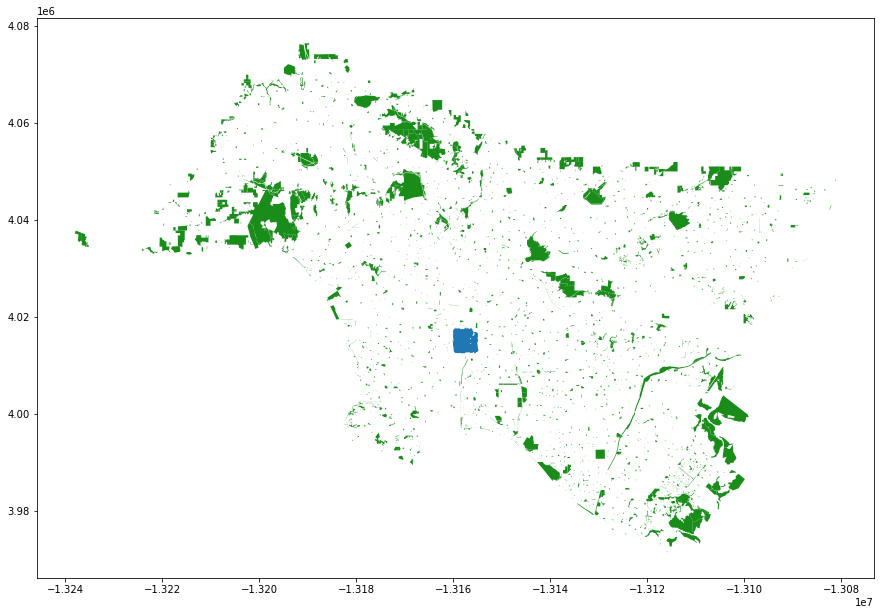

In [87]:
parks_web_mercator = parks.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 
parks_web_mercator[parks_web_mercator['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA'].plot(                                      
                                                               ax=ax,
                                                               color="green",
                                                               alpha=0.9,

)

gdf_ECedges_web_mercator = gdf_ECedges.to_crs(epsg = 3857)

gdf_ECedges_web_mercator.plot(
                        ax=ax
)

At this point, I am bothered. I don't think this will necessarily move my project forward. Therefore, I'm going to create an isochrone map that is just based on East Compton without parks.

In [38]:
minx, miny, maxx, maxy = gdf_ECnodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-118.2170174
33.8800868
-118.1736961
33.9160424
-118.19535675
33.8980646


I found the center of East Compton and will center the isochrone map around there. 

In [41]:
center_node = ox.distance.nearest_nodes(EC,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

gdf_ECnodes.loc[[center_node]]

The id for the nearest node is 6805221306


y           x highway  street_count  \
osmid                                                     
6805221306  33.898849 -118.194626     NaN             3   

                               geometry  
osmid                                    
6805221306  POINT (-118.19463 33.89885)

Found the center node!

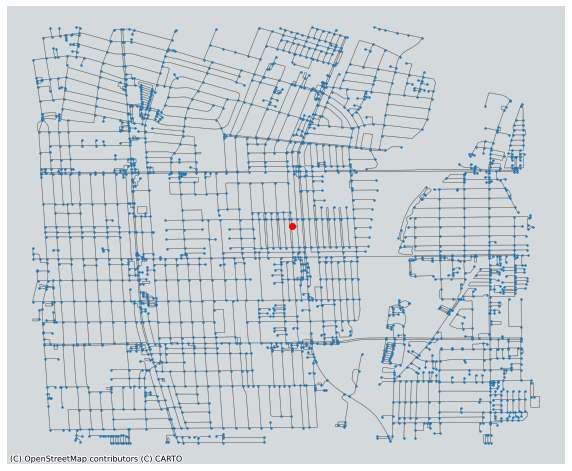

In [42]:
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_ECedges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_ECnodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_ECnodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

Also now noticing that I DID know how to map multiple layers. I'm sure I know how to zoom to certain areas but I just need to figure it out. 

In [43]:
gdf_ECedges['walk_time'] = gdf_ECedges['length']/meters_per_minute

Finding the walk time patterns.

In [67]:
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='inferno', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#000004', '#781c6d', '#ed6925', '#fcffa4']
[20, 15, 10, 5]
['#000004', '#781c6d', '#ed6925', '#fcffa4']


I decided to use a different color scheme!

In [68]:
time_color = list(zip(trip_times, iso_colors))
time_color

for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #000004
The color for 15 minutes is #781c6d
The color for 10 minutes is #ed6925
The color for 5 minutes is #fcffa4


Created a loop like we did in class. 

In [69]:
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(EC, center_node, radius=time)

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_ECnodes.loc[node,'time'] = str(time) + ' mins'
        gdf_ECnodes.loc[node,'color'] = color

There are 1269 nodes within 20 minutes 
There are 735 nodes within 15 minutes 
There are 306 nodes within 10 minutes 
There are 61 nodes within 5 minutes 


Created a loop like we did of class which shows how many nodes are within walking distances from the center

In [70]:
gdf_ECnodes['color'].fillna('#cccccc', inplace=True)

For nodes that are empty, I'm giving a color. 

<AxesSubplot:>

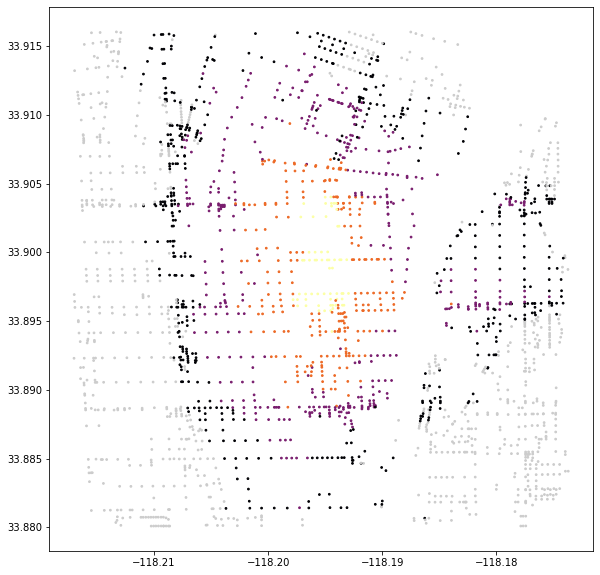

In [71]:
gdf_ECnodes.plot(figsize=(10,10),
               color=gdf_ECnodes['color'],
               markersize=3)

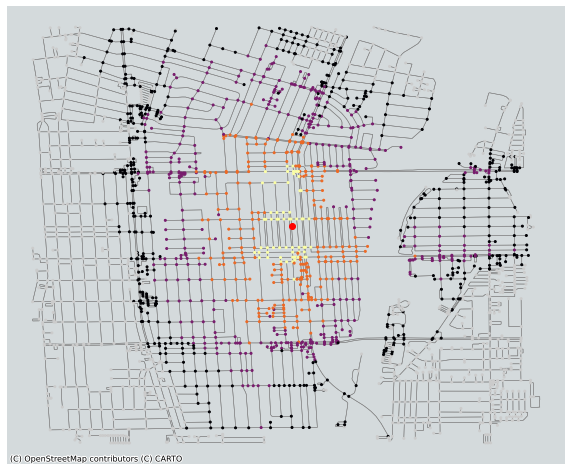

In [73]:
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_ECedges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_ECnodes.plot(ax=ax,
               color=gdf_ECnodes['color'],
               markersize=4, 
               zorder=20)

# add the center node in red also to ax
gdf_ECnodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

Yay, mapped it with the edges and nodes and it turned out very nice. 

<AxesSubplot:>

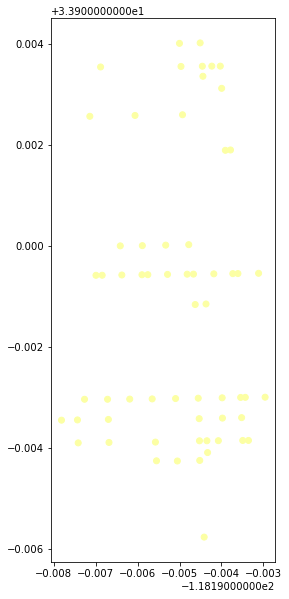

In [75]:
gdf_5 = gdf_ECnodes[gdf_ECnodes['time']=='5 mins']
gdf_5.plot(figsize=(10,10),color=gdf_5.color)

Yeah, as Yoh did this doesn't look create not as a polygon. 

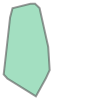

In [76]:
gdf_5.unary_union.convex_hull

In [77]:
isochrones = gdf_ECnodes.dissolve("time")
isochrones

geometry          y  \
time                                                                    
10 mins  MULTIPOINT (-118.20286 33.90355, -118.20264 33...  33.890577   
15 mins  MULTIPOINT (-118.20789 33.90340, -118.20740 33...  33.904346   
20 mins  MULTIPOINT (-118.21255 33.91341, -118.21113 33...  33.884352   
5 mins   MULTIPOINT (-118.19782 33.89656, -118.19743 33...  33.899452   

                  x          highway  street_count    color  
time                                                         
10 mins -118.198492  traffic_signals             3  #ed6925  
15 mins -118.207147   turning_circle             3  #781c6d  
20 mins -118.190055  traffic_signals             3  #000004  
5 mins  -118.194668  traffic_signals             4  #fcffa4

In [78]:
isochrones = isochrones.convex_hull.reset_index()
isochrones

time                                                  0
0  10 mins  POLYGON ((-118.19827 33.88874, -118.20264 33.8...
1  15 mins  POLYGON ((-118.19725 33.88142, -118.20412 33.8...
2  20 mins  POLYGON ((-118.18628 33.88066, -118.20370 33.8...
3   5 mins  POLYGON ((-118.19441 33.89425, -118.19742 33.8...

In [79]:
isochrones.columns=['time','geometry']

<AxesSubplot:>

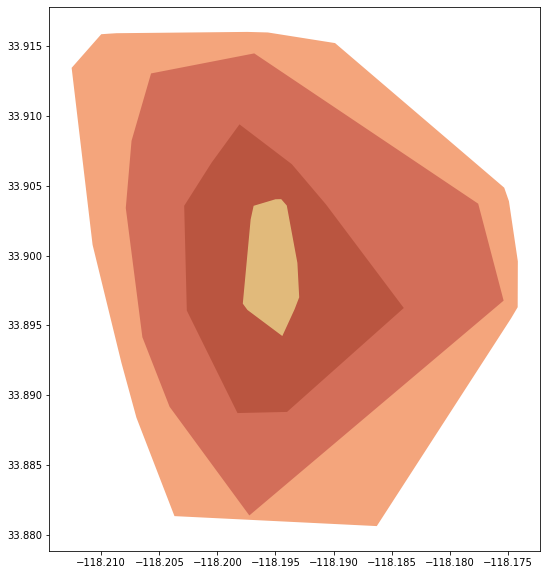

In [82]:
isochrones.plot(figsize=(10,10),alpha=0.6,cmap='inferno')

I played around with the alpha and thought this was nice 

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


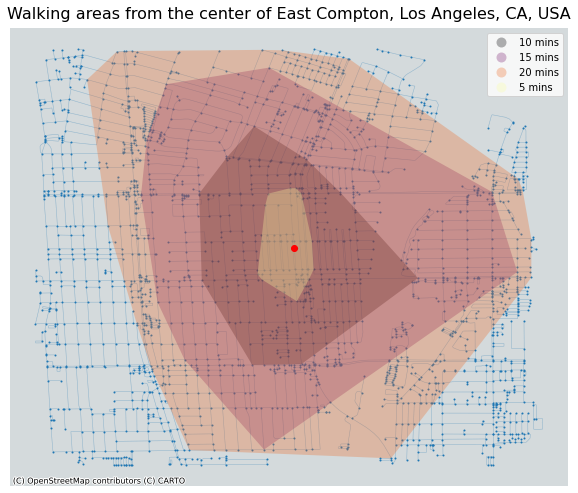

In [84]:

fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
isochrones.plot(alpha=0.3, 
                ax=ax, 
                column='time', 
                cmap='inferno', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_ECnodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_ECnodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdf_ECedges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from the center of ' + address,fontsize=16,pad=10)

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

<AxesSubplot:>

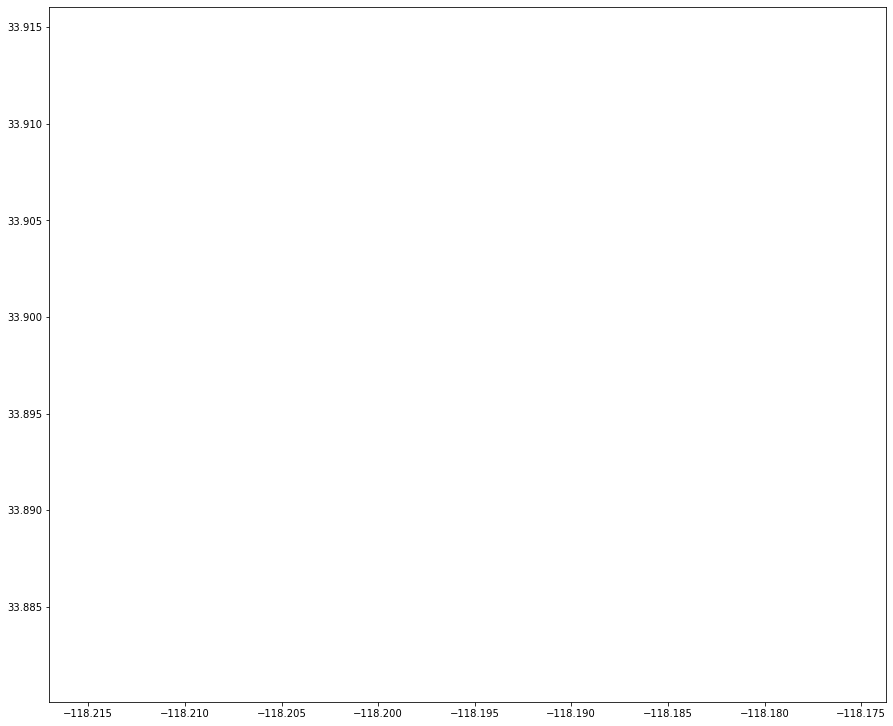

In [91]:
parks_web_mercator = parks.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 
parks_web_mercator[parks_web_mercator['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA'].plot(                                      
                                                               ax=ax,
                                                               color="green",
                                                               alpha=0.9,

)

xlim = (minx, maxx)
ylim = (miny, maxy)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

gdf_ECedges_web_mercator = gdf_ECedges.to_crs(epsg = 3857)

gdf_ECedges_web_mercator.plot(
                        ax=ax
)

Thought I would give something new a try but alas.